In [66]:
import csv
import os,sys
list=[]
count = -1
combined = 0
with open("./Data/SortedPOIs.csv", newline='') as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        if count == -1: # ignore the head info
            count += 1
            continue  
        try:
            x = float(row[0])
            y = float(row[1])
            combined = x*36000000+y
            list.append([x,y,combined,count,count])
        except:
            print ("error on line",count)
        
        count += 1
        if count % 10000 == 0:
            print(count)


def write_csv_file(path, head, data):  
    try:  
        with open(path, 'w', newline='') as csv_file:  
            writer = csv.writer(csv_file, dialect='excel')  
  
            if head is not None:  
                writer.writerow(head)  
  
            for row in data:  
                writer.writerow(row)  
  
            print("Write a CSV file to path %s Successful." % path)  
    except Exception as e:  
        print("Write an CSV file to path: %s, Case: %s" % (path, e)) 

list.sort(key = lambda x:(x[2]))
for i in  range(len(list)):
    list[i][3] = i

list.sort(key = lambda x:(x[0],x[1]))
for i in  range(len(list)):
    list[i][4] = i
write_csv_file("./Data/SortedPOIs.csv",['x','y','combined','order','order2','prediction'],list)


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
Write a CSV file to path ./Data/SortedPOIs.csv Successful.


In [67]:
# load data
import pandas as pd
df = pd.read_csv("./Data/SortedPOIs.csv")
TOTAL = len(df)+1
COL = df.columns
print(TOTAL) # 1157571
# orders = df.iloc[:,2]
# #print(orders)
# dfh = pd.read_csv("./Data/hilbert.csv")
# print(len(dfh))
# df.iloc[:,3]=dfh
print(df)
print(df[df['order']!=df['order2']])

1157571
               x          y      combined    order   order2  prediction
0       -85.0511  -96.00330 -3.061840e+09        0        0         NaN
1       -85.0511  -95.97350 -3.061840e+09        1        1         NaN
2       -85.0494  -80.88040 -3.061778e+09        2        2         NaN
3       -84.9574   88.66650 -3.058466e+09        3        3         NaN
4       -84.9463   88.72900 -3.058067e+09        4        4         NaN
5       -84.9463   88.72900 -3.058067e+09        5        5         NaN
6       -84.9463   88.72900 -3.058067e+09        6        6         NaN
7       -84.9463   88.72900 -3.058067e+09        7        7         NaN
8       -84.8686   88.58830 -3.055270e+09        8        8         NaN
9       -83.8626 -160.31200 -3.019054e+09        9        9         NaN
10      -83.7507   85.75520 -3.015025e+09       10       10         NaN
11      -83.0072   88.59010 -2.988259e+09       11       11         NaN
12      -83.0034   97.15430 -2.988122e+09       12      

In [68]:
# df = df.sort_values(['hilbert'])
# # print(df)
# df = df.reset_index(drop=True)
# df.iloc[:,2] = orders
# print(df)

# import numpy as np
# print(np.any(np.isnan(df))) # should be false
# print(np.all(np.isfinite(df))) # should be true

In [69]:
# http://scikit-learn.org/stable/developers/performance.html
from sklearn import linear_model
from sklearn import ensemble
import ipdb
import time

stages = [1,10,100]
index = []
data = []

start_time=time.time()

for i in range(len(stages)):
    temp = []
    for j in range(stages[i]):
        df_ = pd.DataFrame(columns=COL)
        temp.append(df_)
    data.append(temp)
    
data[0][0] = df
nodatacount = 0

for i in range(len(stages)):
    temp = []
    print("======stage:"+str(i)+"======")
    
    for j in range(stages[i]):
        print("model:"+str(j))
        if len(data[i][j]) == 0:
            nodatacount += 1
            lr = index[0][0]
        else: 
            lr = ensemble.GradientBoostingRegressor()
#             lr = linear_model.LinearRegression()
#             train_x = data[i][j].iloc[:,0:2]
#             train_y = data[i][j].iloc[:,2]
            train_x = data[i][j]['combined'].reshape(-1, 1)
            train_y = data[i][j]['order']
            lr.fit(train_x,train_y)
        temp.append(lr)
        # allocate data
        if i < len(stages)-1:
            predicted = lr.predict(train_x)
            for pi in range(len(predicted)): # do not change the prediction
                #print(item)
                if predicted[pi] < 0:
                    predicted[pi] = 0
                if predicted[pi] >= TOTAL:
                    predicted[pi] = TOTAL-1   
            ModelID = ((predicted/TOTAL)*stages[i+1]).astype(int)
            data[i][j].iloc[:,-1]=ModelID
            for k in range(stages[i+1]):
                data[i+1][k] = data[i+1][k].append(data[i][j].loc[data[i][j]['prediction'] == k])
#             too slow!
#             for k in range(len(ModelID)):
#                 data[i+1][ModelID[k]].loc[data[i+1][ModelID[k]].size/3]=data[i][j].iloc[k,:]
#                 if k % 1000 == 0:
#                     print(k)
    index.append(temp)

elapsed_time = time.time() - start_time
print(elapsed_time)
print(nodatacount)

======stage:0======
model:0


D:\anaconda\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


======stage:1======
model:0
model:1
model:2
model:3
model:4
model:5
model:6
model:7
model:8
model:9
======stage:2======
model:0
model:1
model:2
model:3
model:4
model:5
model:6
model:7
model:8
model:9
model:10
model:11
model:12
model:13
model:14
model:15
model:16
model:17
model:18
model:19
model:20
model:21
model:22
model:23
model:24
model:25
model:26
model:27
model:28
model:29
model:30
model:31
model:32
model:33
model:34
model:35
model:36
model:37
model:38
model:39
model:40
model:41
model:42
model:43
model:44
model:45
model:46
model:47
model:48
model:49
model:50
model:51
model:52
model:53
model:54
model:55
model:56
model:57
model:58
model:59
model:60
model:61
model:62
model:63
model:64
model:65
model:66
model:67
model:68
model:69
model:70
model:71
model:72
model:73
model:74
model:75
model:76
model:77
model:78
model:79
model:80
model:81
model:82
model:83
model:84
model:85
model:86
model:87
model:88
model:89
model:90
model:91
model:92
model:93
model:94
model:95
model:96
model:97
model:98

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


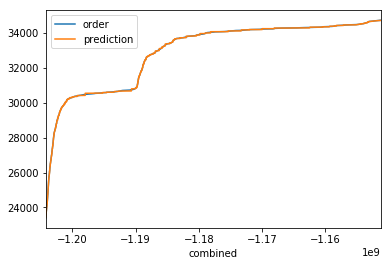

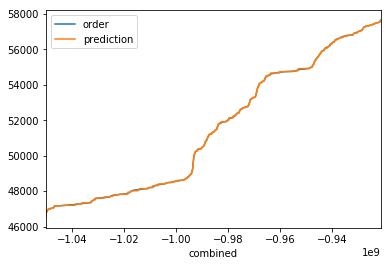

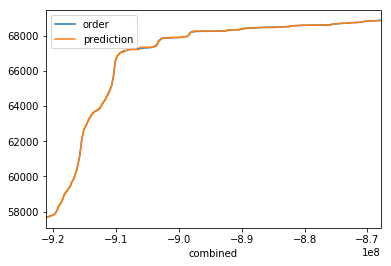

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(6):
    data[2][i]['prediction']=index[2][i].predict(data[2][i]['combined'].reshape(-1, 1))
    data[2][i].plot(x='combined',y=['order','prediction'])
plt.show()

In [70]:
# # model persistent
# from sklearn.externals import joblib

# for i in range(len(index)):
#     for j in range(len(index[i])):
#         joblib.dump(index[i][j], 'index_'+str(i)+'_'+str(j)+'.pkl')

In [71]:
import numpy as np
# use the generated stage index for prediction
def predict_single_item_with_stage_model(model, data, total_size):
    tempy = 0
    modelIndex = 0
    for m in range(len(model)):
#         tempy = model[m][modelIndex].predict(data)
#         tempy = model[m][modelIndex].predict(data.iloc[0,:].reshape(1,-1))
        tempy = model[m][modelIndex].predict(data['combined'].iloc[0].reshape(1,-1))
#         tempy = model[m][modelIndex].predict(data.iloc[0,])
#         tempy = model[m][modelIndex].predict(data.iloc[0,0:2])
        if tempy < 0:
            tempy = 0
        if tempy >= total_size:
            tempy = total_size-1
        if m < len(model)-1:
            modelIndex = int((tempy/total_size)*len(model[m+1]))
    return tempy

In [72]:
def range_query(lower_x, upper_x, lower_y, upper_y, model, df):
    df1 = pd.DataFrame(data=[[lower_x,lower_y,lower_x*36000000+lower_y]], columns=["x","y","combined"], index=[0])
    lower_predicted_position = int(predict_single_item_with_stage_model(index, df1, len(df))[0])
    
    discrepancy = 0
    scan = 0
    number_of_results = 0
    
    true_lower_position = 0
    true_upper_position = 0
    
    predicted_lower_position_x = df.iloc[lower_predicted_position,0]
    predicted_lower_position_y = df.iloc[lower_predicted_position,1]
    
    shift = 0
    # the predicted position is actually lower, search forward
    if (predicted_lower_position_x < lower_x) or (predicted_lower_position_x == lower_x and predicted_lower_position_y < lower_y):
        while (predicted_lower_position_x < lower_x) or (predicted_lower_position_x == lower_x and predicted_lower_position_y < lower_y):
            shift += 1
            scan += 1
            predicted_lower_position_x = df.iloc[lower_predicted_position+shift,0]
            predicted_lower_position_y = df.iloc[lower_predicted_position+shift,1]
        true_lower_position = lower_predicted_position+shift
    else: # search backward
        while (predicted_lower_position_x > lower_x) or (predicted_lower_position_x == lower_x and predicted_lower_position_y > lower_y):
            shift += 1
            predicted_lower_position_x = df.iloc[lower_predicted_position-shift,0]
            predicted_lower_position_y = df.iloc[lower_predicted_position-shift,1]
        true_lower_position = lower_predicted_position-shift+1
    
    discrepancy = shift
    shift = 0
    current_x = df.iloc[true_lower_position,0]
    current_y = df.iloc[true_lower_position,1]
    while (current_x < upper_x) or (current_x == upper_x and current_y <= upper_y):
        shift += 1
        scan += 1
        if current_x >= lower_x and current_x <= upper_x and current_y >= lower_y and current_y <= upper_y:
            number_of_results += 1
#             print(current_x,current_y)
        current_x = df.iloc[true_lower_position+shift,0]
        current_y = df.iloc[true_lower_position+shift,1]
    true_upper_position = true_lower_position+shift-1
    
#     print("discrepancy: ",discrepancy)
#     print("scan: ",scan)
#     print("results: ",number_of_results)
    return discrepancy, scan, number_of_results
            

In [73]:
def absolute_length(lower_x, upper_x, lower_y, upper_y, df):
    len1 = len(df[(df['x'] > lower_x) & (df['x'] < upper_x)])
    len2 = len(df[(df['x'] == lower_x) & (df['y'] >= lower_y)])
    len3 = len(df[(df['x'] == upper_x) & (df['y'] <= upper_y)])
    
    len4 = len(df[(df['x'] >= lower_x) & (df['x'] <= upper_x) & (df['y'] >= lower_y) & (df['y'] <= upper_y)])
#     print("absolute scanned size: ",len1 + len2 + len3)
    return len1 + len2 + len3, len4

In [74]:
# len1 = len(df[(df['x'] > 38.7900) & (df['x'] < 39.0118)])
# len2 = len(df[(df['x'] == 38.7900) & (df['y'] >= -77.2123)])
# len3 = len(df[(df['x'] == 39.0118) & (df['y'] <= -76.8835)])

# print(len1 + len2 + len3)

# df[(df['x'] > 22.1481) & (df['x'] < 22.5457)]
# df[(df['x'] == 22.1481) & (df['y'] >= 113.8436)]
# df[(df['x'] == 22.5457) & (df['y'] <= 114.4379)]

# df[(df['x'] > 22.2201) & (df['x'] < 22.2841)]
# df[(df['x'] == 22.2201) & (df['y'] >= 114.1278)]
# df[(df['x'] == 22.2841) & (df['y'] <= 114.2572)]

In [75]:
# import ipdb
# ipdb.set_trace()
# range_query(38.7900,39.0118,-77.2123,-76.8835,index,df) # Washington DC
# absolute_length(38.7900,39.0118,-77.2123,-76.8835,df)
# print("==========")
# range_query(22.1481,22.5457,113.8436,114.4379,index,df) # Hong Kong
# absolute_length(22.1481,22.5457,113.8436,114.4379,df)
# print("==========")
# range_query(22.2201,22.2841,114.1278,114.2572,index,df) # Hong Kong island
# absolute_length(22.2201,22.2841,114.1278,114.2572,df)

In [76]:
# Range Query Collection
def range_query_collection(collection_path):
    df_range_query = pd.read_csv(collection_path)
    range_size = len(df_range_query)

    total_discrepancy = 0
    total_cost = 0
    total_results = 0
    total_based_scan = 0
    total_true_results = 0
    
    for i in range(len(df_range_query)):
        discrepancy, scan, number_of_results = range_query(df_range_query.iloc[i,0],df_range_query.iloc[i,1],df_range_query.iloc[i,2],df_range_query.iloc[i,3],index,df)
        based_scan, true_results = absolute_length(df_range_query.iloc[i,0],df_range_query.iloc[i,1],df_range_query.iloc[i,2],df_range_query.iloc[i,3],df)
    
        total_discrepancy += discrepancy
        total_cost += scan
        total_results += number_of_results
        total_based_scan += based_scan
        total_true_results += true_results
        
#         print("results: ", true_results)
        
    print("average cost: ",total_cost/range_size)
    print("average records: ",total_results/range_size)
    print("average candidates: ",total_based_scan/range_size)
    print("average true records: ",total_true_results/range_size)
    print("average discrepancy: ",total_discrepancy/range_size)
    print("==============")

In [77]:
# import ipdb
# ipdb.set_trace()

range_query_collection("./Data/RangeQueryCollection100m.csv")
range_query_collection("./Data/RangeQueryCollection200m.csv")
range_query_collection("./Data/RangeQueryCollection500m.csv")
range_query_collection("./Data/RangeQueryCollection1km.csv")
range_query_collection("./Data/RangeQueryCollection2km.csv")
range_query_collection("./Data/RangeQueryCollection5km.csv")
range_query_collection("./Data/RangeQueryCollection10km.csv")
range_query_collection("./Data/RangeQueryCollection20km.csv")
range_query_collection("./Data/RangeQueryCollection50km.csv")
range_query_collection("./Data/RangeQueryCollection100km.csv")

average cost:  81.3
average records:  4.1
average candidates:  66.5
average true records:  4.1
average discrepancy:  20.5
average cost:  151.0
average records:  6.4
average candidates:  140.8
average true records:  6.4
average discrepancy:  19.1
average cost:  367.8
average records:  17.5
average candidates:  356.9
average true records:  17.5
average discrepancy:  16.4
average cost:  779.1
average records:  47.0
average candidates:  758.8
average true records:  47.0
average discrepancy:  26.1
average cost:  1402.4
average records:  148.7
average candidates:  1394.8
average true records:  148.7
average discrepancy:  16.7
average cost:  3187.3
average records:  856.8
average candidates:  3182.2
average true records:  856.8
average discrepancy:  20.5
average cost:  6266.3
average records:  2357.2
average candidates:  6257.2
average true records:  2357.2
average discrepancy:  14.8
average cost:  12359.7
average records:  5161.0
average candidates:  12354.3
average true records:  5161.0
ave

In [15]:
print(len(df[(df['x'] >= 38.7900) & (df['x'] <= 39.0118) & (df['y'] >= -77.2123) & (df['y'] <= -76.8835)]))
print(len(df[(df['x'] >= 22.1481) & (df['x'] <= 22.5457) & (df['y'] >= 113.8436) & (df['y'] <= 114.4379)]))
print(len(df[(df['x'] >= 22.2201) & (df['x'] <= 22.2841) & (df['y'] >= 114.1278) & (df['y'] <= 114.2572)]))
df[(df['x'] >= 22.2201) & (df['x'] <= 22.2841) & (df['y'] >= 114.1278) & (df['y'] <= 114.2572)]

3650
1507
386


x        y   order  hilbert  prediction
511722  22.2276  114.218  511722      NaN           4
511750  22.2341  114.171  511750      NaN           4
511753  22.2346  114.171  511753      NaN           4
511754  22.2346  114.171  511754      NaN           4
511758  22.2351  114.172  511758      NaN           4
511759  22.2351  114.172  511759      NaN           4
511765  22.2360  114.185  511765      NaN           4
511773  22.2391  114.223  511773      NaN           4
511793  22.2433  114.162  511793      NaN           4
511794  22.2433  114.162  511794      NaN           4
511799  22.2441  114.147  511799      NaN           4
511805  22.2444  114.165  511805      NaN           4
511813  22.2453  114.175  511813      NaN           4
511822  22.2458  114.187  511822      NaN           4
511831  22.2466  114.158  511831      NaN           4
511832  22.2469  114.175  511832      NaN           4
511835  22.2470  114.155  511835      NaN           4
511839  22.2474  114.155  511839      NaN           4
511847  22.2485  114.154  511847      NaN           4
511848  22.2485  114.163  511848      NaN           4
511849  22.2486  114.155  511849      NaN           4
511888  22.2514  114.155  511888      NaN           4
511968  22.2567  114.195  511968      NaN           4
512014  22.2591  114.193  512014      NaN           4
512018  22.2596  114.130  512018      NaN           4
512025  22.2605  114.131  512025      NaN           4
512030  22.2610  114.180  512030      NaN           4
512039  22.2616  114.130  512039      NaN           4
512044  22.2621  114.135  512044      NaN           4
512047  22.2623  114.131  512047      NaN           4
...         ...      ...     ...      ...         ...
512625  22.2829  114.153  512625      NaN           4
512626  22.2829  114.155  512626      NaN           4
512627  22.2829  114.189  512627      NaN           4
512629  22.2830  114.154  512629      NaN           4
512630  22.2830  114.155  512630      NaN           4
512631  22.2830  114.159  512631      NaN           4
512632  22.2830  114.173  512632      NaN           4
512633  22.2831  114.139  512633      NaN           4
512635  22.2832  114.138  512635      NaN           4
512636  22.2832  114.139  512636      NaN           4
512637  22.2833  114.138  512637      NaN           4
512638  22.2833  114.138  512638      NaN           4
512639  22.2833  114.145  512639      NaN           4
512643  22.2834  114.138  512643      NaN           4
512644  22.2834  114.151  512644      NaN           4
512645  22.2834  114.151  512645      NaN           4
512646  22.2834  114.156  512646      NaN           4
512647  22.2834  114.159  512647      NaN           4
512648  22.2836  114.135  512648      NaN           4
512649  22.2836  114.153  512649      NaN           4
512650  22.2836  114.154  512650      NaN           4
512652  22.2837  114.149  512652      NaN           4
512655  22.2838  114.152  512655      NaN           4
512656  22.2838  114.192  512656      NaN           4
512657  22.2839  114.134  512657      NaN           4
512658  22.2839  114.154  512658      NaN           4
512660  22.2840  114.138  512660      NaN           4
512661  22.2840  114.158  512661      NaN           4
512662  22.2841  114.153  512662      NaN           4
512663  22.2841  114.158  512663      NaN           4

[386 rows x 5 columns]

In [11]:
import numpy as np
# use the generated stage index for prediction
def predict_with_stage_model(model, data):
    totalSize = len(data)+1
    predicted_y = []
    tempy = 0
    for i in range(len(data)):
        modelIndex = 0
        for m in range(len(model)):
            tempy = model[m][modelIndex].predict(data.iloc[i,:].reshape(1,-1))
#             tempy = model[m][modelIndex].predict(data.iloc[i,])
            if tempy < 0:
                tempy = 0
            if tempy >= totalSize:
                tempy = totalSize-1
            if m < len(model)-1:
                modelIndex = int((tempy/totalSize)*len(model[m+1]))
                
        predicted_y.append(tempy)
        
    return predicted_y

In [ ]:
import matplotlib.pyplot as plt
import time

train_x=df.iloc[:,0:2]
train_y=df.iloc[:,2]
# print(df.iloc[1:3,3])
# print(train_x.iloc[1:3,])

start_time=time.time()
predicted_y = predict_with_stage_model(index, train_x)
elapsed_time = time.time() - start_time
print(elapsed_time)

fig, ax = plt.subplots()
ax.scatter(train_y, predicted_y, edgecolors=(0, 0, 0))
ax.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# estimate the result
from sklearn.metrics import explained_variance_score
train_y=df.iloc[:,2]
print(len(train_y))
print(len(predicted_y))

# 1- Var(Ytrue - Ypred)/Var(Ytrue)  best: 1  the lower the worse
result = explained_variance_score(train_y, predicted_y)
print(result)

In [ ]:
# calculate scan item amount
# index = 0
# scan = 0
# totalscan = 0
# for i in range(len(df)):
#     index = predicted_y[i]
#     scan = abs(index-i) # distance to exact
#     totalscan += scan

# print(totalscan/len(df))


In [ ]:
# space filling curve range query
# 用 C++ 改写